<a href="https://colab.research.google.com/github/550tealeaves/DATA-70500-working-with-data/blob/main/ORIG_IntroMapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction to Mapping
We'll cover some of the basics of using GIS data and the data management tools we've used earlier in the semester.

To begin, we need a shapefile to be able to draw a map of the geography of interest. In this example, I'll use a file for nation-states. (There are open source shapefiles for geographies at lots of different scales--cities, regions, nations, the world.)

Here's the link for the global shapefile: https://www.geoboundaries.org/globalDownloads.html

I'm using the geoPackage format for this example. **We'll use GeoPandas for data managment. It is based on pandas and has useful mapping functions.**

User guide: https://geopandas.org/en/stable/docs/user_guide.html

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install folium
!pip install mapclassify


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 1.1 MB/s eta 0:00:00


In [3]:
import geopandas as gpd
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sb
import matplotlib.pyplot as plt
import folium
import mapclassify
import shapefile



In [ ]:
GlobalIndicators_map = gpd.read_file('/content/drive/MyDrive/Data/geoBoundariesCGAZ_ADM0.gpkg')
GlobalIndicators_map.head()

,id,shapeGroup,shapeType,shapeName,geometry
0,None,AFG,ADM0,Afghanistan,"POLYGON ((74.88986 37.23408, 74.88959 37.23314..."
1,None,GBR,ADM0,United Kingdom,"MULTIPOLYGON (((33.013 34.64377, 33.01273 34.6..."
2,None,ALB,ADM0,Albania,"POLYGON ((20.07889 42.55579, 20.07929 42.55547..."
3,None,DZA,ADM0,Algeria,"POLYGON ((8.64195 36.94096, 8.64195 36.94069, ..."
4,None,USA,ADM0,United States,"MULTIPOLYGON (((-168.15793 -14.53181, -168.161..."


<Axes: >

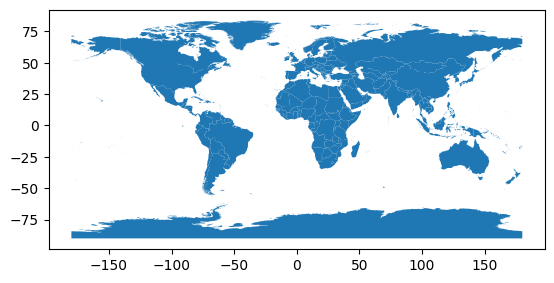

In [ ]:
# Goal is to produce a map that shows some sociological information
GlobalIndicators_map.plot()

In [ ]:
GlobalIndicators_health = pd.read_csv('/content/drive/MyDrive/Data/global_health.csv')
GlobalIndicators_demog = pd.read_csv('/content/drive/MyDrive/Data/demographics_dataset.csv')

In [ ]:
# Look at year variable
GlobalIndicators_health['Year'].value_counts()

,count
Year,
2012,188
2013,188
2014,188
2015,188
2016,188
2017,188
2018,188
2019,188
2020,188


In [ ]:
# Sample all cases from 2021
GlobalIndicators_health = GlobalIndicators_health.loc[lambda GlobalIndicators_health: GlobalIndicators_health['Year'] == 2021, :]

In [ ]:
# All the variables in the dataset
GlobalIndicators_health.columns

Index(['Country', 'Country_Code', 'Year', 'Fertility_Rate',
       'Urban_Population_Percent', 'Total_Population', 'Water_Access_Percent',
       'Unemployment_Rate', 'Sanitary_Expense_Per_GDP', 'Life_Expectancy',
       'Life_Expectancy_Female', 'Life_Expectancy_Male', 'Infant_Deaths',
       'GDP_Per_Capita', 'Hospital_Beds_Per_1000', 'Female_Population',
       'Male_Population', 'Alcohol_Consumption_Per_Capita',
       'Immunization_Rate', 'Sanitary_Expense_Per_Capita',
       'CO2_Exposure_Percent', 'Air_Pollution', 'Labour_Force_Total',
       'Tuberculosis_Per_100000', 'Suicide_Rate_Percent',
       'Obesity_Rate_Percent', 'Underweight_Rate_Percent',
       'Overweight_Rate_Percent', 'Safe_Water_Access_Percent'],
      dtype='object')

In [ ]:
# Use merge method in geopandas to combine the dataframes of demographics_dataset & global_health into the map data

# Matching them up based on the IS03 & Country_Code = combine cases correctly
# Geo data gets added to demo & health data for each country
GlobalIndicators_map = GlobalIndicators_map.merge(GlobalIndicators_demog, left_on='shapeGroup', right_on='ISO3')
GlobalIndicators_map = GlobalIndicators_map.merge(GlobalIndicators_health, left_on='shapeGroup', right_on='Country_Code')


GlobalIndicators_map.head()

,id,shapeGroup,shapeType,shapeName,geometry,ISO3,Country_x,Human Development Groups,UNDP Developing Regions,HDI Rank (2021),...,Sanitary_Expense_Per_Capita,CO2_Exposure_Percent,Air_Pollution,Labour_Force_Total,Tuberculosis_Per_100000,Suicide_Rate_Percent,Obesity_Rate_Percent,Underweight_Rate_Percent,Overweight_Rate_Percent,Safe_Water_Access_Percent
0,None,AFG,ADM0,Afghanistan,"POLYGON ((74.88986 37.23408, 74.88959 37.23314...",AFG,Afghanistan,Low,SA,180.0,...,81.319763,NaN,NaN,9356574.0,185.0,NaN,12.64,5.70,42.81,72.96
1,None,GBR,ADM0,United Kingdom,"MULTIPOLYGON (((33.013 34.64377, 33.01273 34.6...",GBR,United Kingdom,Very High,NaN,18.0,...,5738.484863,NaN,NaN,34311328.0,NaN,NaN,NaN,NaN,NaN,NaN
2,None,ALB,ADM0,Albania,"POLYGON ((20.07889 42.55579, 20.07929 42.55547...",ALB,Albania,High,ECA,67.0,...,464.742859,NaN,NaN,1382433.0,15.0,NaN,22.36,0.71,57.27,94.09
3,None,DZA,ADM0,Algeria,"POLYGON ((8.64195 36.94096, 8.64195 36.94069, ...",DZA,Algeria,High,AS,91.0,...,204.566620,NaN,NaN,12202063.0,54.0,NaN,15.32,4.05,49.49,90.37
4,None,USA,ADM0,United States,"MULTIPOLYGON (((-168.15793 -14.53181, -168.161...",USA,United States,Very High,NaN,21.0,...,12012.241211,NaN,NaN,166198588.0,NaN,NaN,NaN,NaN,NaN,NaN


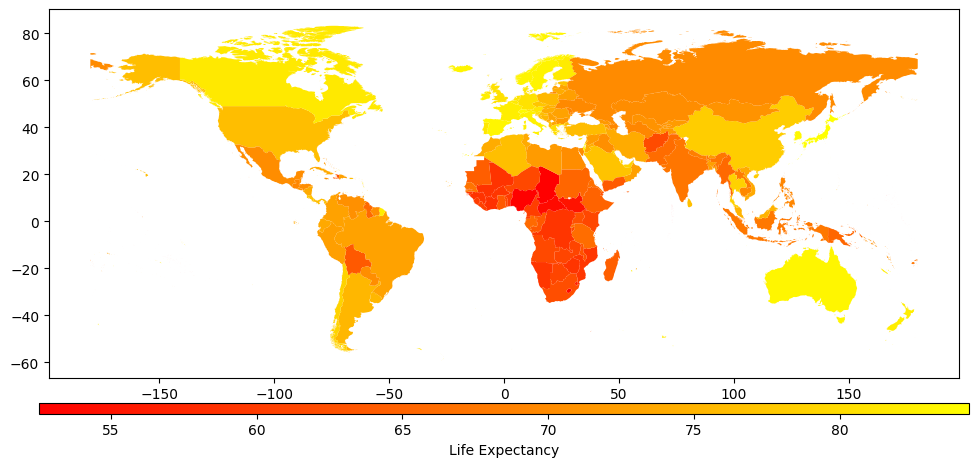

In [ ]:
# Code here lets you edit the design of the map
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1, 1, figsize=(12, 24))  #subplots method controls map size
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="3%", pad=0.25)

# drawas map and legend
GlobalIndicators_map.plot(
    column='Life_Expectancy',
    ax=ax,
    legend=True,
    cax=cax,
    cmap='autumn', #built-in color map
    legend_kwds={"label": "Life Expectancy", "orientation": "horizontal"}, #Places the label of life expectancy horizontally
);


You can see options for color maps for the plot here:
https://matplotlib.org/stable/users/explain/colors/colormaps.html

- You can create your own colors if you don't like the defaults

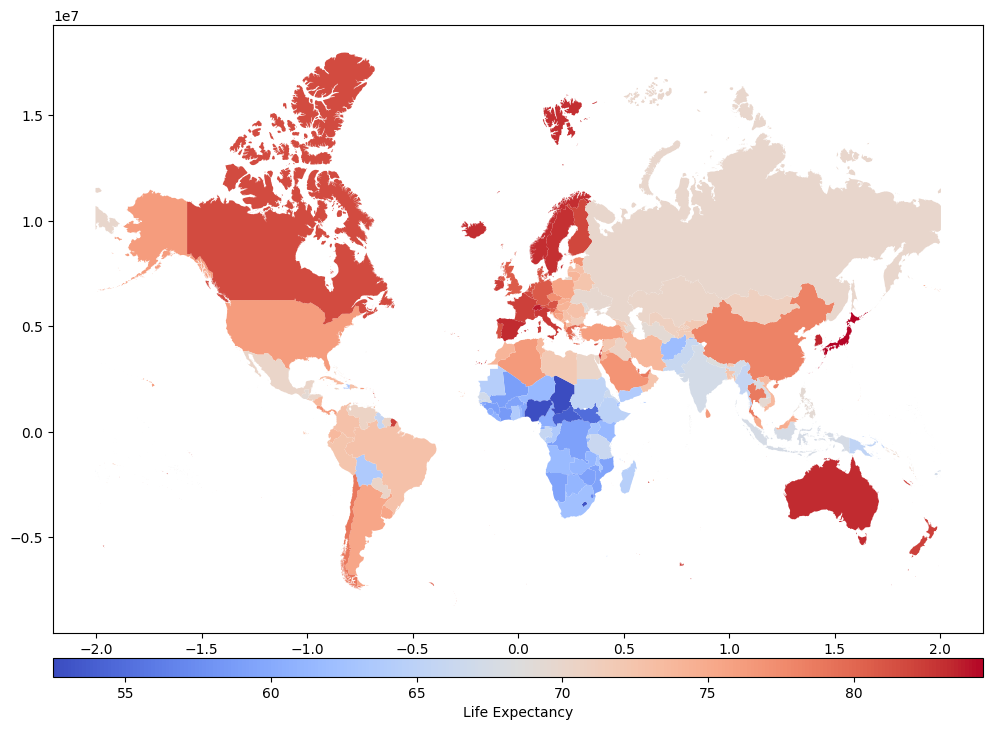

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1, 1, figsize=(12, 24))
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="3%", pad=0.25)

# Here, we're going to change the projection of the map
GlobalIndicators_map = GlobalIndicators_map.to_crs(epsg=6893) #to_crs will supply projection

GlobalIndicators_map.plot(
    column='Life_Expectancy',
    ax=ax,
    legend=True,
    cax=cax,
    cmap='coolwarm',
    legend_kwds={"label": "Life Expectancy", "orientation": "horizontal"},
);


GeoPandas uses the PROJ library for map projections. You can see the options here: https://proj.org/en/stable/operations/projections/index.html

In [ ]:
# We can create new variables based on the variables in the data files if we want to tell a particular story with the maps.

#Create variable that measures differences b/w life expectancy for men & women

GlobalIndicators_map['Life Expectancy Diff'] = GlobalIndicators_map['Life_Expectancy_Female'] - GlobalIndicators_map['Life_Expectancy_Male']
GlobalIndicators_map['Life Expectancy Diff'].describe()

,Life Expectancy Diff
count,184.000000
mean,5.332217
std,1.885847
min,0.785000
25%,3.998750
50%,5.071000
75%,6.450500
max,10.796000


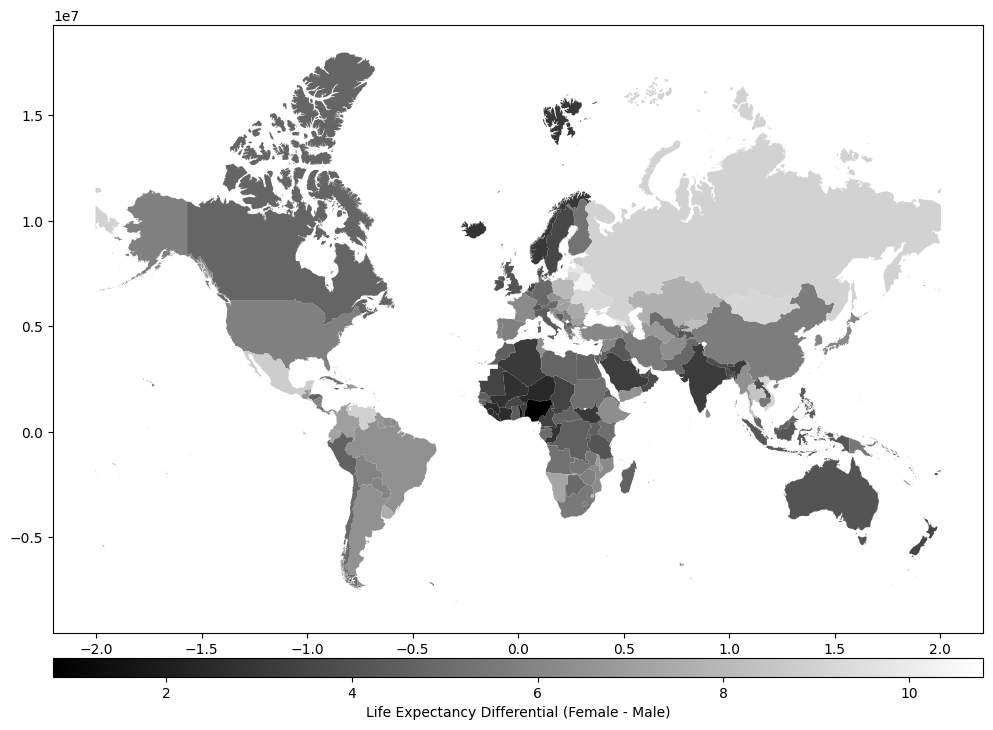

In [ ]:
#This map shows a grayscale map that can be good for print journals

from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1, 1, figsize=(12, 24))
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="3%", pad=0.25)

# Here, we're going to change the projection of the map
GlobalIndicators_map = GlobalIndicators_map.to_crs(epsg=6893)

GlobalIndicators_map.plot(
    column='Life Expectancy Diff',
    ax=ax,
    legend=True,
    cax=cax,
    cmap='grey',
    legend_kwds={"label": "Life Expectancy Differential (Female - Male)", "orientation": "horizontal"},
);


In [ ]:
# Here, we're going to read in a geoJSON file from a server to create the geoPandas DataFrame.
# This one is from NYC Department of City Planning for City Council districts. You can find others
# at https://www.nyc.gov/site/planning/data-maps/open-data/districts-download-metadata.page

url = 'https://services5.arcgis.com/GfwWNkhOj9bNBqoJ/arcgis/rest/services/NYC_City_Council_Districts/FeatureServer/0/query?where=1=1&outFields=*&outSR=4326&f=pgeojson'
nycd_map = gpd.read_file(url)
nycd_map.head()


,OBJECTID,CounDist,Shape__Area,Shape__Length,geometry
0,1,3,7.631671e+07,81955.340465,"POLYGON ((-73.99631 40.76981, -73.99526 40.769..."
1,2,6,8.267269e+07,56770.177483,"POLYGON ((-73.95111 40.79429, -73.9516 40.7936..."
2,3,7,5.518614e+07,52375.098402,"POLYGON ((-73.94137 40.8309, -73.94152 40.8305..."
3,4,27,2.108055e+08,86554.050688,"POLYGON ((-73.72966 40.72049, -73.72924 40.719..."
4,5,38,1.517368e+08,177740.220476,"POLYGON ((-73.99265 40.64174, -73.99336 40.641..."


<Axes: >

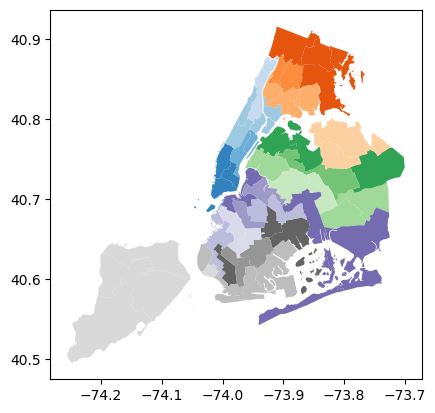

In [ ]:
#Basemap of city council district
nycd_map.plot(column='CounDist', cmap='tab20c')

In [ ]:
#Restaurant inspection result
#Gives coordinates for restaurant

#Can plot locations on base map of NYC

nycdoh_map = gpd.read_file('/content/drive/MyDrive/Data/DOHMH New York City Restaurant Inspection Results_20241205.geojson')
nycdoh_map.head()


,nta,zipcode,latitude,dba,violation_code,score,cuisine_description,bbl,building,longitude,...,bin,street,community_board,record_date,critical_flag,action,phone,council_district,camis,geometry
0,MN36,10032,40.844234833234,KORONET PIZZA,None,None,None,1021420100,4087,-73.938965164058,...,1063495,BROADWAY,112,2024-12-04 06:00:11,Not Applicable,None,6465595566,10,50103832,None
1,BX05,10468,40.873931223539,UNICO TACO BAR,None,None,None,2033210013,3010,-73.889110271622,...,2017626,JEROME AVENUE,207,2024-12-04 06:00:11,Not Applicable,None,6463271776,11,50155231,None
2,None,10036,None,DOUGHNUTTERY EVENTS.,None,None,None,None,None,None,...,None,WEST 42 STREET,None,2024-12-04 06:00:11,Not Applicable,None,9179910564,None,50144825,None
3,MN24,10013,40.717706475419,MUSE PAINTBAR,None,None,None,1001430017,329,-74.010616639386,...,1001551,GREENWICH STREET,101,2024-12-04 06:00:11,Not Applicable,None,8886076873,01,50146187,None
4,MN19,10022,40.758268177392,FLIK INTERNATIONAL CORP.,None,None,None,1013070023,599,-73.971054408587,...,1036467,LEXINGTON AVENUE,106,2024-12-04 06:00:11,Not Applicable,None,7043285090,04,50104755,None


In [ ]:
 #Eliminate cases w/o location data OR had location outside of NYC

nycdoh_map = nycdoh_map.loc[lambda nycdoh_map: nycdoh_map['longitude'] != 'None', :]
nycdoh_map = nycdoh_map.loc[lambda nycdoh_map: nycdoh_map['latitude'] != 'None', :]
nycdoh_map = nycdoh_map.loc[lambda nycdoh_map: nycdoh_map['longitude'] != 0, :]
nycdoh_map = nycdoh_map.loc[lambda nycdoh_map: nycdoh_map['latitude'] != 0, :]

In [ ]:
nycdoh_map['longitude'].describe()

,longitude
count,259603.000000
mean,-73.941971
std,0.089032
min,-74.249100
25%,-73.989395
50%,-73.957733
75%,-73.900307
max,-73.700928


In [ ]:
nycdoh_map.info(verbose=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 259962 entries, 0 to 262633
Data columns (total 27 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   nta                    259318 non-null  object        
 1   zipcode                259962 non-null  object        
 2   latitude               259603 non-null  float32       
 3   dba                    259962 non-null  object        
 4   violation_code         255139 non-null  object        
 5   score                  246749 non-null  object        
 6   cuisine_description    256724 non-null  object        
 7   bbl                    259318 non-null  object        
 8   building               259593 non-null  object        
 9   longitude              259603 non-null  float32       
 10  inspection_date        259962 non-null  datetime64[ms]
 11  grade_date             115820 non-null  datetime64[ms]
 12  grade                  124466 non-null  o

The DOH inspection data file has location information, coded as longitude and latitude. To use it with geoPandas, we'll need to create a geometry variable, a data object in geoPandas. This will allow us to plot the locations as points.

To do this, we'll use the shapely library and then convert the DOH data file to a new geoPandas map geoDataFrame.

In [ ]:
# Merge basemap city council and restaurant inspection list on the longitude & latitude

from shapely.geometry import Point, Polygon
geometry = [Point(xy) for xy in zip(nycdoh_map['longitude'], nycdoh_map['latitude'])]
nyc_map = gpd.GeoDataFrame(nycdoh_map, crs='EPSG:4326', geometry=geometry)
nyc_map.head()

,nta,zipcode,latitude,dba,violation_code,score,cuisine_description,bbl,building,longitude,...,bin,street,community_board,record_date,critical_flag,action,phone,council_district,camis,geometry
0,MN36,10032,40.844234,KORONET PIZZA,None,None,None,1021420100,4087,-73.938965,...,1063495,BROADWAY,112,2024-12-04 06:00:11,Not Applicable,None,6465595566,10,50103832,POINT (-73.93896 40.84423)
1,BX05,10468,40.873932,UNICO TACO BAR,None,None,None,2033210013,3010,-73.889107,...,2017626,JEROME AVENUE,207,2024-12-04 06:00:11,Not Applicable,None,6463271776,11,50155231,POINT (-73.88911 40.87393)
2,None,10036,NaN,DOUGHNUTTERY EVENTS.,None,None,None,None,None,NaN,...,None,WEST 42 STREET,None,2024-12-04 06:00:11,Not Applicable,None,9179910564,None,50144825,POINT EMPTY
3,MN24,10013,40.717705,MUSE PAINTBAR,None,None,None,1001430017,329,-74.010620,...,1001551,GREENWICH STREET,101,2024-12-04 06:00:11,Not Applicable,None,8886076873,01,50146187,POINT (-74.01062 40.7177)
4,MN19,10022,40.758266,FLIK INTERNATIONAL CORP.,None,None,None,1013070023,599,-73.971054,...,1036467,LEXINGTON AVENUE,106,2024-12-04 06:00:11,Not Applicable,None,7043285090,04,50104755,POINT (-73.97105 40.75827)


<Axes: >

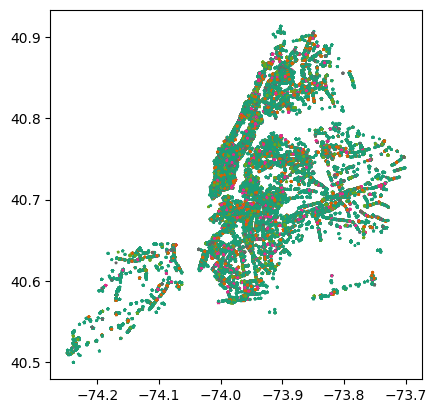

In [ ]:
nyc_map.plot(column='grade', marker='*', cmap='Dark2', markersize=2)

<Axes: >

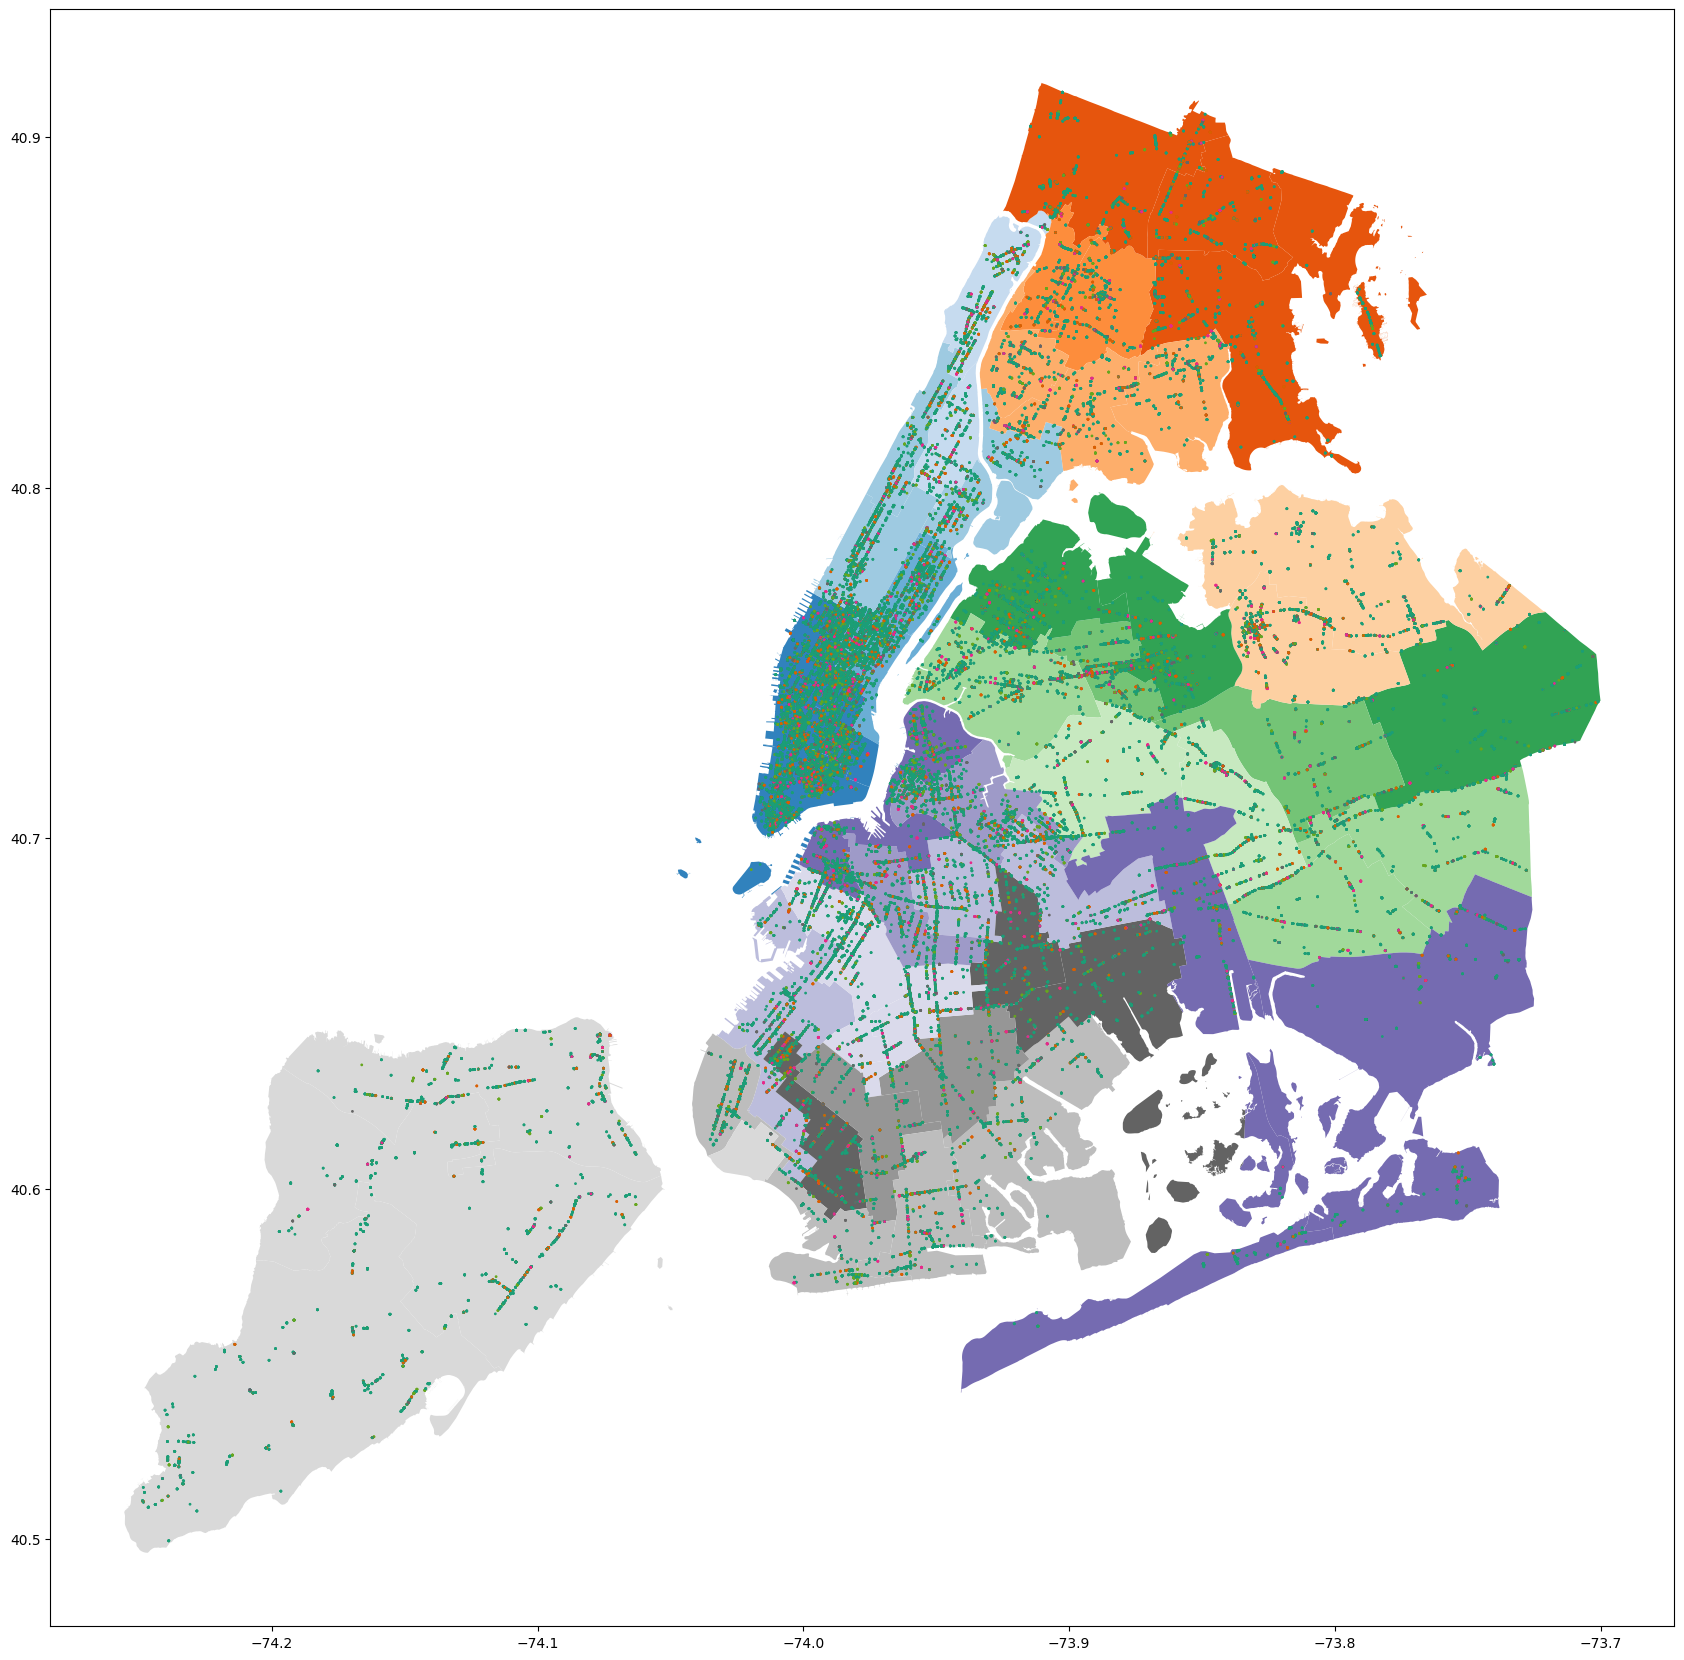

In [ ]:
# Let's put them all together! Combine them as layers on a single map

fig, ax = plt.subplots(1, 1, figsize=(21, 21))
base = nycd_map.plot(column='CounDist', cmap='tab20c', ax=ax)
nyc_map.plot(column='grade', ax=base, marker='o', cmap='Dark2', markersize=1)

## Activity

Go to https://www.nyc.gov/site/planning/data-maps/open-data/districts-download-metadata.page and identify a geography for NYC that you want to map. Read the shapefile into a geoPandas DataFrame.

Use the NYC Open Data portal, https://opendata.cityofnewyork.us/, to find interesting data that contains GIS information.

Create a map to visualize the results.